This dataset was obtained from Kaggle: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/data."

The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.


 Fraud detection is the process of detecting anomalous financial records from within a broader set of normal transactions.

Because fraud is by definition less frequent than normal behaviour within a financial services ecosystem, there will be far less confirmed historical instances of fraudulent behaviour compared with the known good/normal behaviour, leading to an imbalance between the fraudulent and non-fraudulent samples

Feature engineering is crucial, as it involves converting domain knowledge from fraud analysts and investigators into data that can be used to detect suspicious behaviours


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [5]:
df.shape

(284807, 31)

We have 284807 rows (transactions) and 31 features.

In [6]:
df['Class'].value_counts()

,count
Class,
0,284315
1,492


Out of the 284,807 transactions, 284,315 were not fraudulent, while the remaining 492 were fraudulent. In this case, our dataset is highly imbalanced between the two classes.

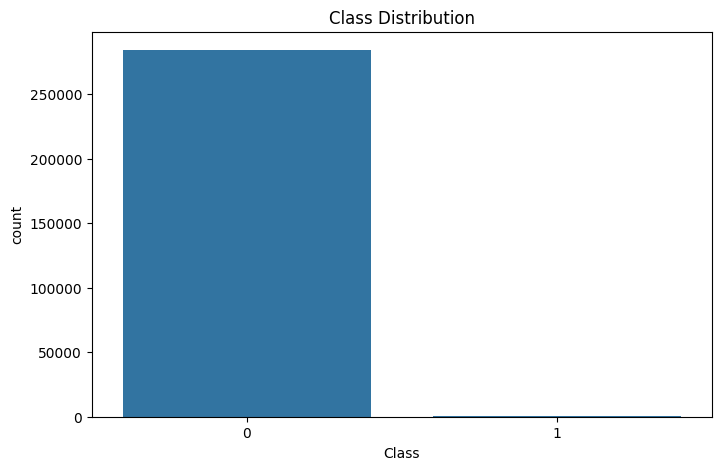

In [7]:
#Class distribution
plt.figure(figsize = (8,5))
sns.countplot(x = 'Class', data = df)
plt.title('Class Distribution')
plt.show()

In [8]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [9]:
dup_count = df.duplicated().sum()
print(f"Total duplicate rows: {dup_count}")

Total duplicate rows: 1081


In [10]:
dup_fraud_count = df[df['Class']==1].duplicated().sum()
print(f"Total duplicate rows for fraud transactions: {dup_fraud_count}")

Total duplicate rows for fraud transactions: 19


In [11]:
dup_fraud_count = df[df['Class']==0].duplicated().sum()
print(f"Total duplicate rows for fraud transactions: {dup_fraud_count}")

Total duplicate rows for fraud transactions: 1062


Since the dataset includes 31 features, including Time, Amount, and V1-V28 (which are transformed features), we can reasonably assume that an exactly identical transaction occurring at the exact same second is highly unlikely.

Without knowing the specific meaning of V1-V28, we can still conclude that if all 31 columns match perfectly, it is most likely due to a data collection, merging, or processing issue, rather than an actual anomaly in fraudulent transactions, and so we will drop them.

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df['Class'].value_counts()

,count
Class,
0,283253
1,473


Checking for null values

In [14]:
df['Amount'].describe()

,Amount
count,283726.000000
mean,88.472687
std,250.399437
min,0.000000
25%,5.600000
50%,22.000000
75%,77.510000
max,25691.160000


We apply the 'describe()' function to the 'Amount' column. The average transaction amount is 88.35, with a standard deviation of 250.12, indicating a wide range of transaction values. The maximum recorded transaction is 25,691.16, while the median transaction is 22.00, showing a highly skewed distribution.

array([[<Axes: title={'center': 'Time'}>, <Axes: title={'center': 'V1'}>,
        <Axes: title={'center': 'V2'}>, <Axes: title={'center': 'V3'}>,
        <Axes: title={'center': 'V4'}>, <Axes: title={'center': 'V5'}>],
       [<Axes: title={'center': 'V6'}>, <Axes: title={'center': 'V7'}>,
        <Axes: title={'center': 'V8'}>, <Axes: title={'center': 'V9'}>,
        <Axes: title={'center': 'V10'}>, <Axes: title={'center': 'V11'}>],
       [<Axes: title={'center': 'V12'}>, <Axes: title={'center': 'V13'}>,
        <Axes: title={'center': 'V14'}>, <Axes: title={'center': 'V15'}>,
        <Axes: title={'center': 'V16'}>, <Axes: title={'center': 'V17'}>],
       [<Axes: title={'center': 'V18'}>, <Axes: title={'center': 'V19'}>,
        <Axes: title={'center': 'V20'}>, <Axes: title={'center': 'V21'}>,
        <Axes: title={'center': 'V22'}>, <Axes: title={'center': 'V23'}>],
       [<Axes: title={'center': 'V24'}>, <Axes: title={'center': 'V25'}>,
        <Axes: title={'center': 'V26'}>, <

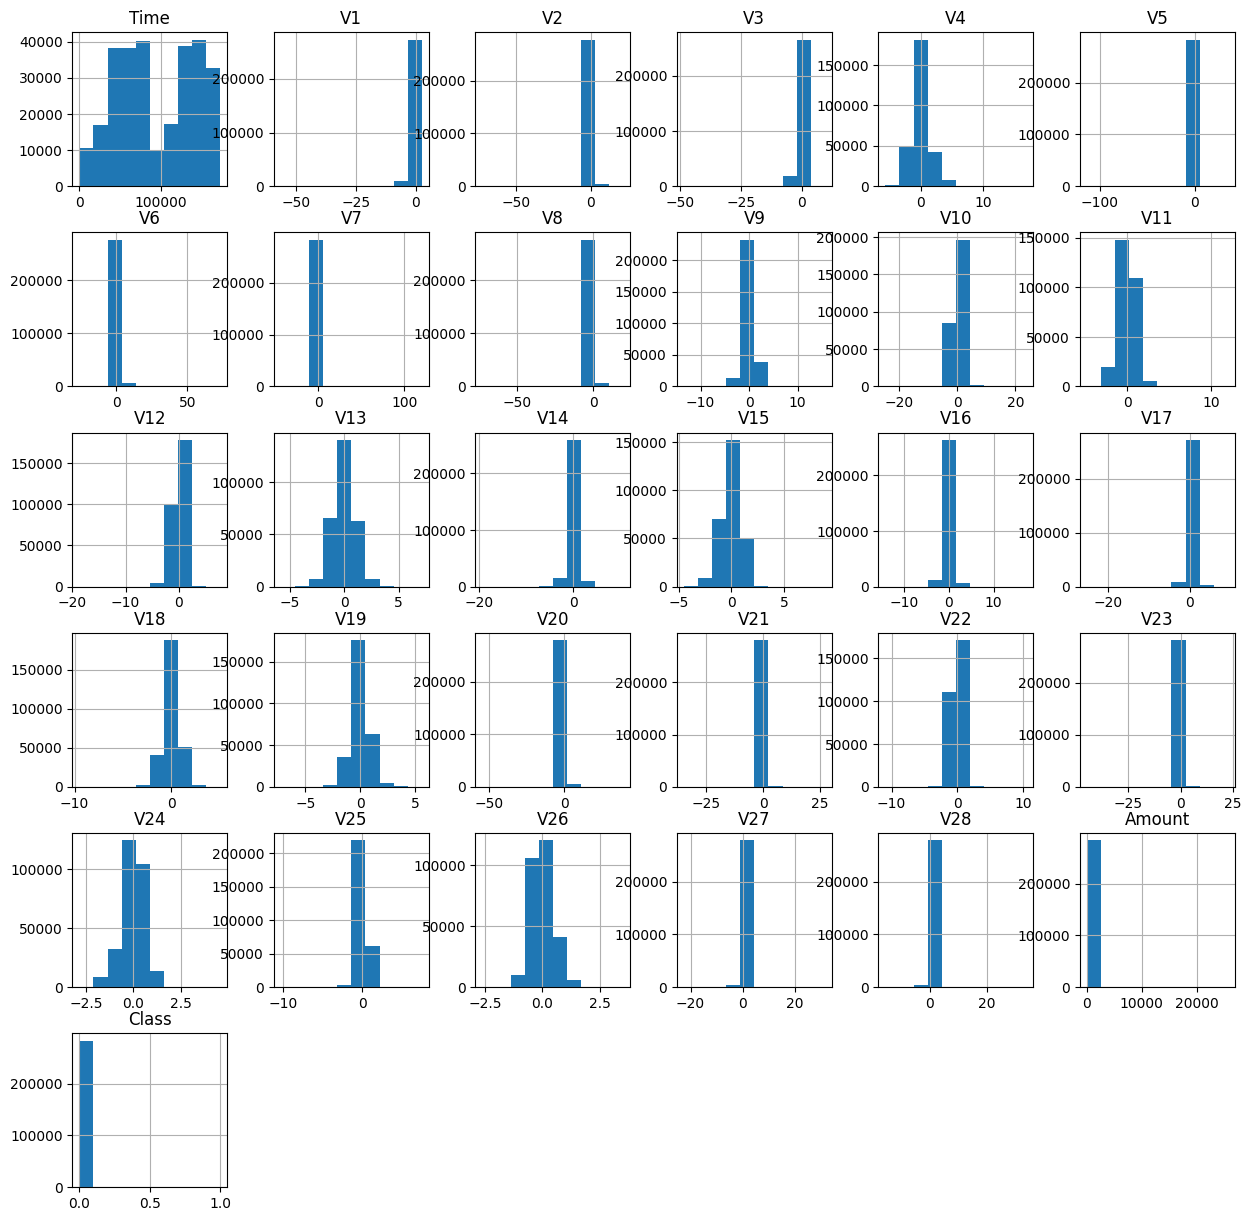

In [15]:
df.hist(figsize=(15,15))

The histograms above show the distribution of each feature in the dataset.
The **Time** feature has a bimodal distribution, suggesting transactions occur more frequently at certain times of the day.


In [16]:
for col in ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15']:
    min_val = df[col].min()
    max_val = df[col].max()
    print(f"{col}: Min = {min_val}, Max = {max_val}")

V1: Min = -56.407509631329, Max = 2.45492999121121
V2: Min = -72.7157275629303, Max = 22.0577289904909
V3: Min = -48.3255893623954, Max = 9.38255843282114
V4: Min = -5.68317119816995, Max = 16.8753440335975
V5: Min = -113.743306711146, Max = 34.8016658766686
V6: Min = -26.1605059358433, Max = 73.3016255459646
V7: Min = -43.5572415712451, Max = 120.589493945238
V8: Min = -73.2167184552674, Max = 20.0072083651213
V9: Min = -13.4340663182301, Max = 15.5949946071278
V10: Min = -24.5882624372475, Max = 23.7451361206545
V11: Min = -4.79747346479757, Max = 12.0189131816199
V12: Min = -18.6837146333443, Max = 7.8483920756446
V13: Min = -5.79188120632084, Max = 7.12688295859376
V14: Min = -19.2143254902614, Max = 10.5267660517847
V15: Min = -4.49894467676621, Max = 8.87774159774277


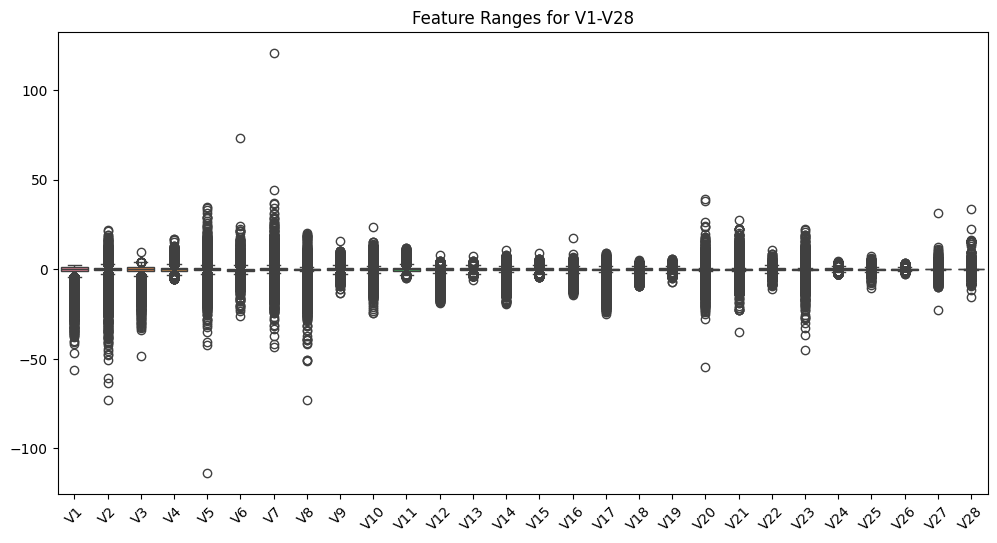

In [17]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28']])
plt.xticks(rotation=45)
plt.title("Feature Ranges for V1-V28")
plt.show()

This plot shows the distribution of the anonymized PCA-transformed features (V1 to V28) from the credit card transactions dataset. Most features are centered around zero, with several showing significant outliers and varying ranges.

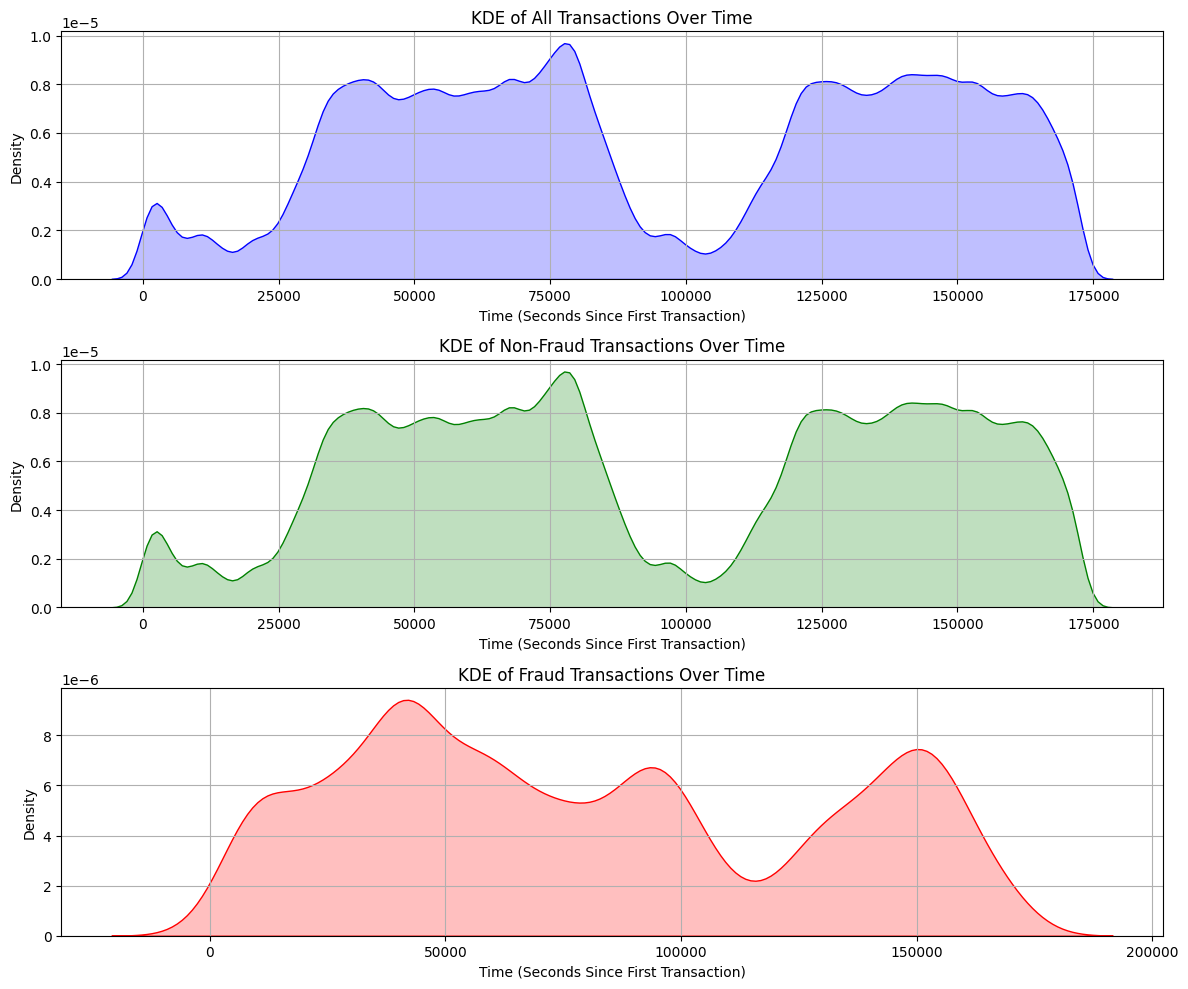

In [18]:
fig, axes = plt.subplots(3, 1, figsize=(12, 10))

sns.kdeplot(df["Time"], fill=True, color="blue", bw_adjust=0.5, ax=axes[0])
axes[0].set_title("KDE of All Transactions Over Time")
axes[0].set_xlabel("Time (Seconds Since First Transaction)")
axes[0].set_ylabel("Density")
axes[0].grid(True)

sns.kdeplot(df[df["Class"] == 0]["Time"], fill=True, color="green", bw_adjust=0.5, ax=axes[1])
axes[1].set_title("KDE of Non-Fraud Transactions Over Time")
axes[1].set_xlabel("Time (Seconds Since First Transaction)")
axes[1].set_ylabel("Density")
axes[1].grid(True)

sns.kdeplot(df[df["Class"] == 1]["Time"], fill=True, color="red", bw_adjust=0.5, ax=axes[2])
axes[2].set_title("KDE of Fraud Transactions Over Time")
axes[2].set_xlabel("Time (Seconds Since First Transaction)")
axes[2].set_ylabel("Density")
axes[2].grid(True)

plt.tight_layout()

plt.show()




*   Comparing the KDE plots of all transactions and non-fraud transactions, there are no noticeable differences, as fraud cases make up only 0.172% of the total transactions. This extreme imbalance causes the overall distribution to be dominated by non-fraud transactions.
*   Regarding the KDE plot of fraud transactions, it appears similar to the general transaction pattern but shows an additional peak around 9,000 seconds.


In [19]:
y=df['Class']
X=df.drop(['Class','Amount','Time'], axis=1 )

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X , y , test_size = 0.1 , random_state= 42 , stratify =y)
print( "X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (255353, 28)
X_test: (28373, 28)
y_train: (255353,)
y_test: (28373,)


We split our dataset into training and testing sets using an 90/10 stratified split. Since the Class column is highly imbalanced, with very few fraud cases, we used stratify=y to ensure that both the training and test sets maintain the same class distribution. This helps the model learn patterns from both fraud and non-fraud transactions and ensures the test set is a fair evaluation of model performance.

We dropped the Amount and Time columns before training, focusing on the 28 anonymized PCA-transformed features (V1 to V28).

In [21]:
X_train

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
50340,0.642632,-2.386717,0.220606,-1.041128,-1.953948,-0.302390,-0.596753,-0.145963,-1.786001,1.174708,...,-0.732991,0.501536,-0.085624,-0.821965,-0.163091,0.036139,-0.098478,-0.425025,-0.020542,0.099838
231956,-0.303349,1.077423,-0.439382,-0.474360,0.507029,-0.700396,0.925844,0.070086,-0.505994,-0.856738,...,0.328494,-0.048732,0.434505,1.236417,-0.180111,-0.585031,-0.312352,-0.123843,0.084584,0.154410
144562,-0.740971,0.728013,2.962252,-0.062982,-0.009021,0.006129,0.383069,-0.094311,-0.050369,-0.661958,...,-1.087447,0.125604,0.254299,0.927449,-0.455751,0.078986,0.451672,-0.340382,-0.062657,-0.136544
91048,1.525561,-0.916912,0.095089,-1.331110,-1.406128,-1.290635,-0.651940,-0.260966,-1.895885,1.483877,...,0.043128,-0.424702,-0.579300,-1.430047,0.223568,0.281701,0.182369,-0.524147,-0.001712,0.017139
189620,1.554678,-0.898056,-2.786752,-0.011206,0.379134,-1.736647,1.450043,-0.842845,-0.248726,-0.044147,...,0.133886,0.522597,0.442690,0.797574,-0.442470,0.120845,0.401659,1.606878,-0.243493,-0.049385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3525,-1.708940,-1.296255,1.953170,-2.277028,-0.510388,0.408807,0.329231,0.477331,1.058119,-2.015791,...,-0.304827,0.557379,0.466843,0.860939,0.361317,-0.264732,0.423478,0.065689,-0.026392,0.077562
150598,-0.035645,-0.139387,0.339134,-1.494976,0.318468,-1.391005,0.276625,-0.329313,0.363875,-0.252764,...,0.485958,-0.023626,-0.003988,0.123015,0.161821,-0.033205,-0.998618,-0.551168,0.172633,0.234407
242674,-0.875424,1.159992,0.573970,1.178888,-0.206267,0.260623,0.371124,0.443532,-0.011588,-0.192711,...,1.507298,-0.353885,-0.100597,-0.157726,0.049751,-0.014156,-0.513855,-0.771982,-0.242970,0.094879
60594,1.247036,0.348595,0.589407,0.982998,-0.222000,-0.452687,-0.012336,-0.140168,0.052173,-0.069423,...,-0.188029,-0.042753,-0.211495,-0.556038,0.037106,-0.133330,0.403622,-0.595756,0.043911,0.032002


In [22]:
print("Fraud in y_train:", len(np.where(y_train == 1)[0]))
print("Fraud in y_test:", len(np.where(y_test == 1)[0]))

Fraud in y_train: 426
Fraud in y_test: 47


In [23]:
 from sklearn.linear_model import LogisticRegression

 model = LogisticRegression()

 model.fit(X_train, y_train)


LogisticRegression()

We use Logistic Regression, a simple and widely-used machine learning algorithm for binary classification, to predict whether a transaction is fraudulent or not.

In [24]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

After training the model on the training data, we generate predictions on the test set and evaluate performance using a confusion matrix.

In [25]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[28319,     7],
       [   15,    32]])

The confusion matrix shows how many predictions were correct (true positives and true negatives) versus incorrect (false positives and false negatives), helping us assess how well the model identifies fraud cases.


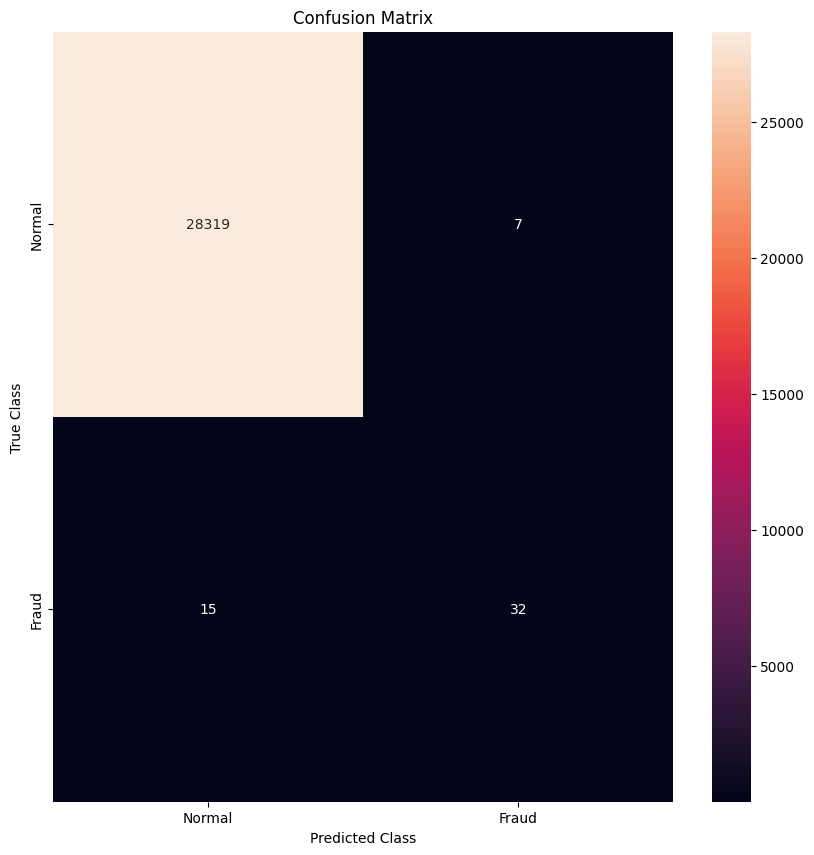

In [26]:
Labels = ['Normal','Fraud']

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,10))
sns.heatmap(conf_matrix, xticklabels = Labels, yticklabels = Labels, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.show()


In [27]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight = 'balanced')

model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

We use Logistic Regression with class_weight='balanced' to deal with the imbalanced dataset. This makes the model pay more attention to fraud cases, which are much fewer than normal transactions.

In [28]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [29]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[27604,   722],
       [    4,    43]])

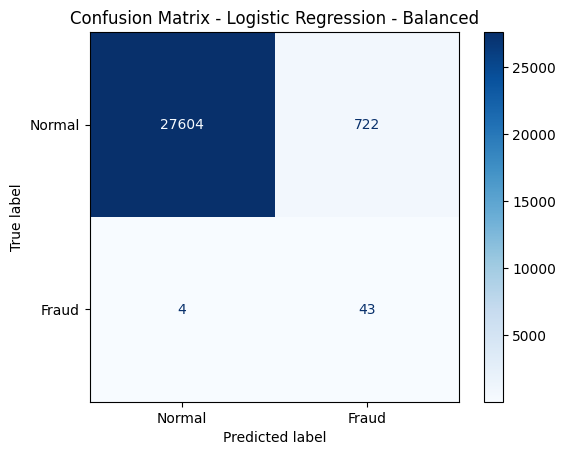

In [30]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Normal", "Fraud"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression - Balanced")
plt.show()

Overall, the model finds more fraud cases than before, but also gives more false alarms.

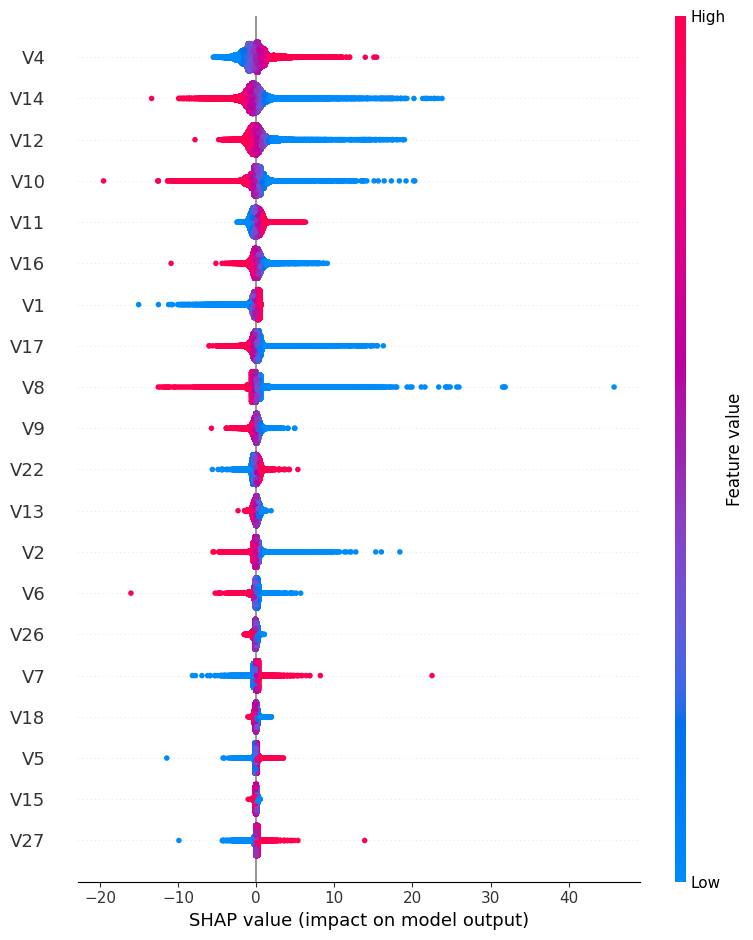

In [31]:
import shap
shap.initjs()
explainer = shap.LinearExplainer(model, X_train)
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X)

The SHAP summary plot shows how each feature contributes to the model’s predictions.
Each row is a feature, and each dot is a single data point.

The color tells us the original feature value:

Red = high value

Blue = low value
(based on the color bar on the right)

The position on the x-axis shows how much that value pushed the model’s output:

Dots going to the right → pushed the model toward predicting fraud

Dots going to the left → pushed it toward non-fraud

So if a row (feature) spreads more to the right, it contributes more to fraud predictions, and if it spreads to the left, it contributes to non-fraud.

This makes it easy to see which features matter most and how they affect the model's decision.

Since our dataset is very imbalanced, with very few fraud cases compared to normal ones, we will adjust the class_weight parameter in our Logistic Regression model to help it pay more attention to the fraud cases. We tested different weight values and found that setting it to 1:10 (normal:fraud) worked well. This means the model treats fraud cases as 10 times more important during training, which helps it catch more of them.

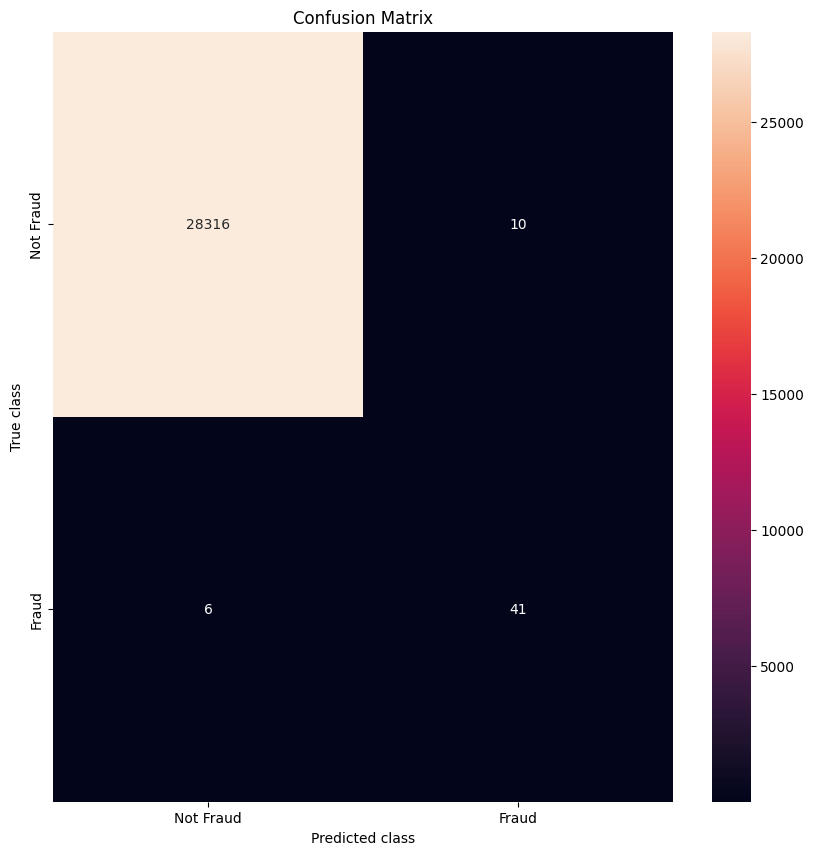

In [32]:
model = LogisticRegression(class_weight={0:1, 1:10})
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Labels = ['Not Fraud', 'Fraud']
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,10))
sns.heatmap(conf_matrix, xticklabels = Labels, yticklabels= Labels, annot = True, fmt ='d')
plt.title('Confusion Matrix')
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

We will now use XGBoost, a powerful gradient boosting algorithm that builds an ensemble of decision trees, to improve fraud detection by handling complex patterns and imbalanced data more effectively.

In [33]:
import xgboost as xgb

In [34]:
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [35]:
y_pred = model.predict(X_test)

In [36]:
confusion_matrix(y_test, y_pred)

array([[28321,     5],
       [    7,    40]])

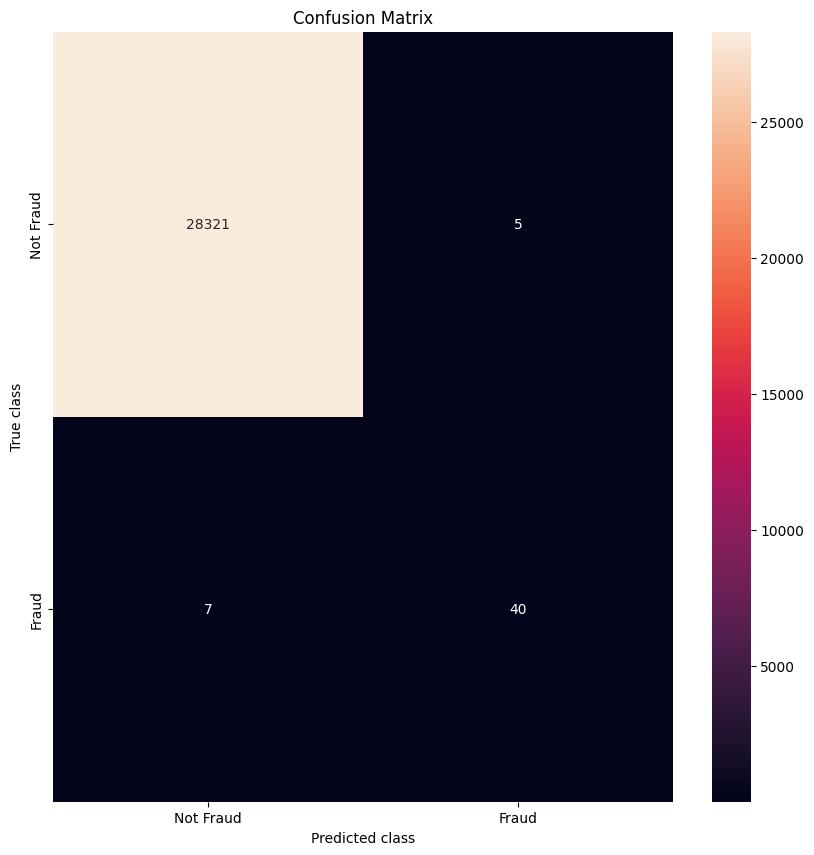

In [37]:
Labels = ['Not Fraud', 'Fraud']
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,10))
sns.heatmap(conf_matrix, xticklabels = Labels, yticklabels= Labels, annot = True, fmt ='d')
plt.title('Confusion Matrix')
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

We will now set scale_pos_weight=50 to tell the model to focus more on the minority class (fraud), which is much less frequent but very important.

In [38]:
model = xgb.XGBClassifier(scale_pos_weight = 50)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [39]:
y_pred = model.predict(X_test)
y_pred


array([0, 0, 0, ..., 0, 0, 0])

In [40]:
confusion_matrix(y_test, y_pred)

array([[28323,     3],
       [    6,    41]])

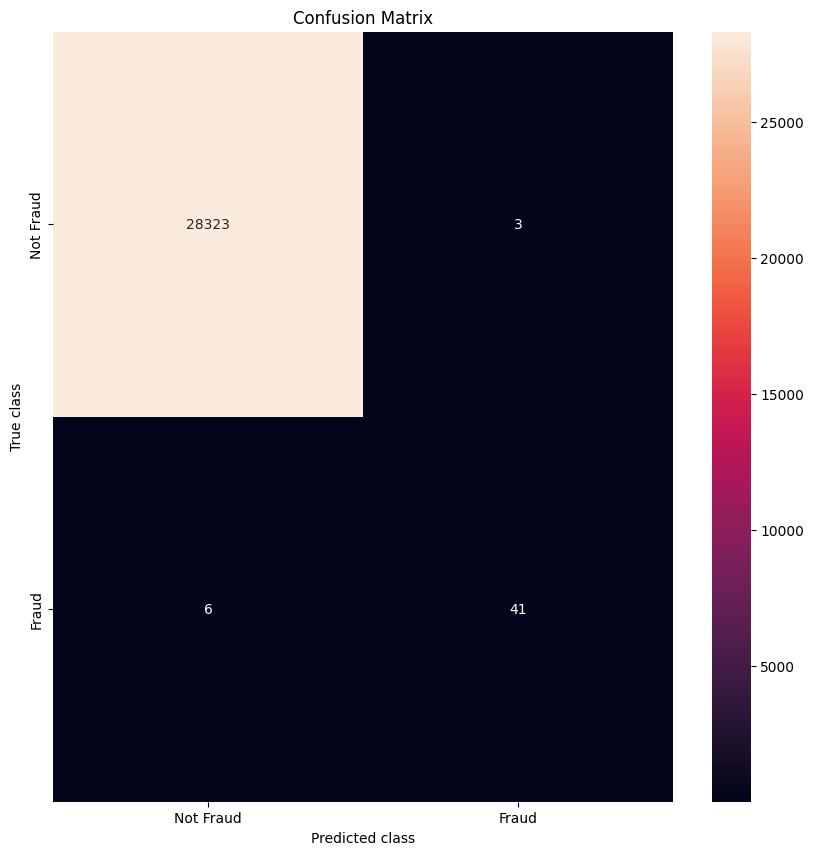

In [41]:
Labels = ['Not Fraud', 'Fraud']
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,10))
sns.heatmap(conf_matrix, xticklabels = Labels, yticklabels= Labels, annot = True, fmt ='d')
plt.title('Confusion Matrix')
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

This confusion matrix shows that our model is performing very well. It correctly identified 28,323 non-fraud cases and 41 fraud cases. Only 3 non-fraud cases were incorrectly marked as fraud, and 6 actual fraud cases were missed.

To better understand how well our model performs, especially on the imbalanced fraud dataset, we will now look at evaluation metrics like precision, recall, F1-score, and AUC.

In [42]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_pred))
print("AUPRC:", average_precision_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Precision: 0.9318181818181818
Recall: 0.8723404255319149
F1 Score: 0.9010989010989011
ROC AUC: 0.9361172578835173
AUPRC: 0.8130741378954206

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     28326
           1       0.93      0.87      0.90        47

    accuracy                           1.00     28373
   macro avg       0.97      0.94      0.95     28373
weighted avg       1.00      1.00      1.00     28373



Precision (0.93): Out of all the transactions the model predicted as fraud, 93% were actually fraud.

Recall (0.87): Out of all actual fraud cases, the model correctly found 87% of them.

F1 Score (0.90): Harmonic mean of precision and recall.

ROC AUC (0.93): Shows how well the model separates fraud from non-fraud.

AUPRC (0.81): Focuses more on the minority class (fraud).

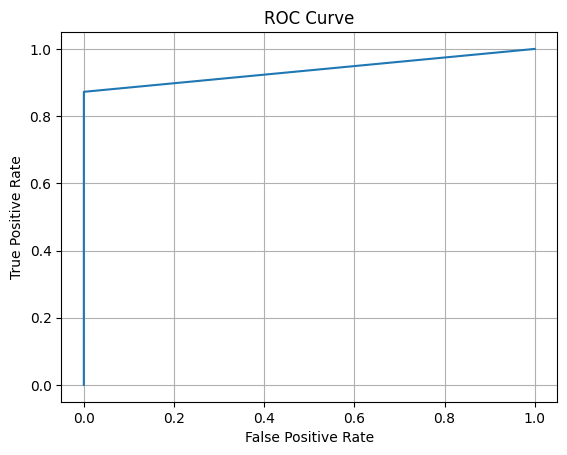

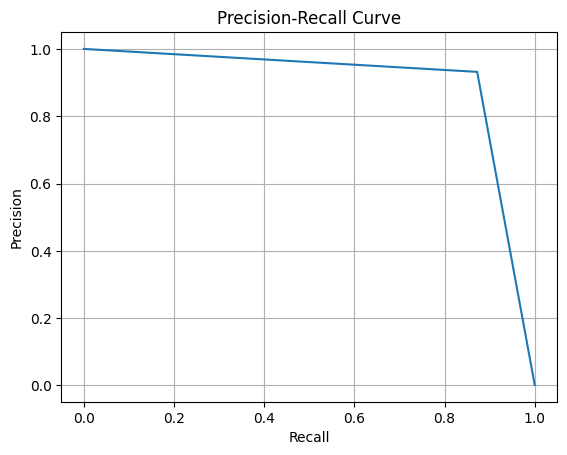

In [43]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.show()

# Precision-Recall Curve
prec, rec, _ = precision_recall_curve(y_test, y_pred)
plt.plot(rec, prec)
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid()
plt.show()


These curves show that the model performs well on the test set. The ROC curve is close to the top-left corner, and the Precision-Recall curve stays high, indicating a strong balance between detecting fraud and minimizing false alarms.